In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')

import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/anoushkaberry/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anoushkaberry/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anoushkaberry/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Cleaning df

In [17]:
#Reading dataframe with anomalies
df2=pd.read_csv('anomalies_dummies.csv', index_col=0)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70448 entries, 0 to 70447
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  70448 non-null  object 
 1   permno                70448 non-null  int64  
 2   ticker                70448 non-null  object 
 3   price                 70448 non-null  float64
 4   volume                70448 non-null  float64
 5   return                70448 non-null  float64
 6   high                  70448 non-null  float64
 7   low                   70448 non-null  float64
 8   open                  70448 non-null  float64
 9   avg_price             70448 non-null  float64
 10  mkt_cap               70448 non-null  float64
 11  pct_return            70448 non-null  float64
 12  name_price_attention  70448 non-null  float64
 13  volatility            70448 non-null  float64
 14  industry              67932 non-null  object 
 15  revenue               77

In [18]:
# Rename the 'Ticker' column to 'Ticker'
df2 = df2.rename(columns={'date': 'Date', 'ticker': 'Ticker'})
df2['Date'] = pd.to_datetime(df2['Date'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70448 entries, 0 to 70447
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  70448 non-null  datetime64[ns]
 1   permno                70448 non-null  int64         
 2   Ticker                70448 non-null  object        
 3   price                 70448 non-null  float64       
 4   volume                70448 non-null  float64       
 5   return                70448 non-null  float64       
 6   high                  70448 non-null  float64       
 7   low                   70448 non-null  float64       
 8   open                  70448 non-null  float64       
 9   avg_price             70448 non-null  float64       
 10  mkt_cap               70448 non-null  float64       
 11  pct_return            70448 non-null  float64       
 12  name_price_attention  70448 non-null  float64       
 13  volatility           

In [19]:
df2.head()

,Date,permno,Ticker,price,volume,return,high,low,open,avg_price,...,volatility,industry,revenue,total_assets,earnings_per_share,book_to_market,dt_date,jan_dummy,monday_dummy,annual_rep_release
0,2014-01-02,10107,MSFT,-0.999221,1.117934,-0.006683,-0.992613,-1.004799,-0.997672,-0.998750,...,-0.494860,Technology,NaN,NaN,NaN,NaN,2014-01-02,1,0,0
1,2014-01-03,10107,MSFT,-1.001527,1.148820,-0.006728,-0.994243,-1.009502,-0.999057,-1.001888,...,-0.438358,Technology,NaN,NaN,NaN,NaN,2014-01-03,1,0,0
2,2014-01-06,10107,MSFT,-1.008721,1.870624,-0.021133,-0.997232,-1.014112,-1.002286,-1.005672,...,-0.410107,Technology,NaN,NaN,NaN,NaN,2014-01-06,1,1,0
3,2014-01-07,10107,MSFT,-1.006139,1.417816,0.007750,-1.000854,-1.013171,-1.007130,-1.007056,...,-0.498392,Technology,NaN,NaN,NaN,NaN,2014-01-07,1,0,0
4,2014-01-08,10107,MSFT,-1.012134,2.840056,-0.017852,-1.004023,-1.019098,-1.010129,-1.011579,...,-0.448952,Technology,NaN,NaN,NaN,NaN,2014-01-08,1,0,0


In [20]:
# Filtering out rows where all three specified columns have a value of 0
df2_filtered = df2[(df2['jan_dummy'] == 0) & (df2['monday_dummy'] == 0) & (df2['annual_rep_release'] == 0)]

# Updated df
df2_filtered.head()

,Date,permno,Ticker,price,volume,return,high,low,open,avg_price,...,volatility,industry,revenue,total_assets,earnings_per_share,book_to_market,dt_date,jan_dummy,monday_dummy,annual_rep_release
22,2014-02-04,10107,MSFT,-1.006692,2.607476,-0.003564,-0.994524,-1.012795,-1.001179,-1.003646,...,-0.382032,Technology,NaN,NaN,NaN,NaN,2014-02-04,0,0,0
23,2014-02-05,10107,MSFT,-1.011580,2.625814,-0.014580,-1.001035,-1.017028,-1.007453,-1.009041,...,-0.429529,Technology,NaN,NaN,NaN,NaN,2014-02-05,0,0,0
24,2014-02-06,10107,MSFT,-1.008260,1.412302,0.010050,-1.003027,-1.018063,-1.011974,-1.010564,...,-0.448952,Technology,NaN,NaN,NaN,NaN,2014-02-06,0,0,0
25,2014-02-07,10107,MSFT,-1.004755,1.291427,0.010503,-0.999948,-1.015053,-1.007176,-1.007518,...,-0.445421,Technology,NaN,NaN,NaN,NaN,2014-02-07,0,0,0
27,2014-02-11,10107,MSFT,-0.999083,1.221291,0.010190,-0.993881,-1.007056,-1.002009,-1.000503,...,-0.477203,Technology,NaN,NaN,NaN,NaN,2014-02-11,0,0,0


In [21]:
df2_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51870 entries, 22 to 70447
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  51870 non-null  datetime64[ns]
 1   permno                51870 non-null  int64         
 2   Ticker                51870 non-null  object        
 3   price                 51870 non-null  float64       
 4   volume                51870 non-null  float64       
 5   return                51870 non-null  float64       
 6   high                  51870 non-null  float64       
 7   low                   51870 non-null  float64       
 8   open                  51870 non-null  float64       
 9   avg_price             51870 non-null  float64       
 10  mkt_cap               51870 non-null  float64       
 11  pct_return            51870 non-null  float64       
 12  name_price_attention  51870 non-null  float64       
 13  volatility          

In [22]:
# Splitting the dataset into pre-COVID and post-COVID periods
pre_covid_data = df2_filtered[df2_filtered['Date'] < '2020-01-01']
post_covid_data = df2_filtered[df2_filtered['Date'] >= '2020-01-01']

# Defining a function to calculate volatility measure (e.g., standard deviation of returns)
def calculate_volatility(returns_series):
    return returns_series.std()

# Calculating volatility for each row in pre-COVID period
pre_covid_data['vol'] = pre_covid_data.groupby('Ticker')['pct_return'].transform(calculate_volatility)

# Calculating volatility for each row in post-COVID period
post_covid_data['vol'] = post_covid_data.groupby('Ticker')['pct_return'].transform(calculate_volatility)

# Selecting the row with the highest volatility for each ticker in pre-COVID period
pre_covid_highest_volatility = pre_covid_data.loc[pre_covid_data.groupby('Ticker')['vol'].idxmax()]

# Selecting  the row with the highest volatility for each ticker in post-COVID period
post_covid_highest_volatility = post_covid_data.loc[post_covid_data.groupby('Ticker')['vol'].idxmax()]

print("Rows with Highest Volatility for Each Ticker Before COVID:")
print(pre_covid_highest_volatility)

print("\nRows with Highest Volatility for Each Ticker After COVID:")
print(post_covid_highest_volatility)

# Sorting  the pre_covid_highest_volatility DataFrame based on the 'vol' column in descending order
pre_covid_highest_volatility_sorted = pre_covid_highest_volatility.sort_values(by='vol', ascending=False)

# Displaying the sorted DataFrame
pre_covid_highest_volatility_sorted.head()


Rows with Highest Volatility for Each Ticker Before COVID:
            Date  permno Ticker     price    volume    return      high  \
2538  2014-02-04   14593   AAPL  3.350813  0.129517  0.014476  3.282194   
42794 2014-02-04   14008   AMGN -0.274077 -0.384803 -0.008308 -0.265173   
52858 2014-02-04   59176    AXP -0.567197 -0.367753  0.013758 -0.564191   
57890 2014-02-04   19561     BA -0.216339 -0.134778 -0.008450 -0.210206   
47826 2014-02-04   18542    CAT -0.488798 -0.281168  0.000866 -0.492286   
25182 2014-02-04   90215    CRM -0.779704 -0.331505  0.042586 -0.775731   
32730 2014-02-04   76076   CSCO -1.140893  2.079282  0.011601 -1.133700   
22666 2014-02-04   14541    CVX -0.319733 -0.110384 -0.002789 -0.316700   
37762 2014-02-04   26403    DIS -0.686640  0.014845  0.015145 -0.686080   
60406 2014-02-04   86868     GS  0.150015 -0.487215  0.012139  0.140927   
17634 2014-02-04   66181     HD -0.650484 -0.119004 -0.001598 -0.644424   
55374 2014-02-04   10145    HON -0.514070

/var/folders/h_/t7j5x_l10kg4zbr6vvxlqx5h0000gn/T/ipykernel_9090/1922674548.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_covid_data['vol'] = pre_covid_data.groupby('Ticker')['pct_return'].transform(calculate_volatility)
/var/folders/h_/t7j5x_l10kg4zbr6vvxlqx5h0000gn/T/ipykernel_9090/1922674548.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_covid_data['vol'] = post_covid_data.groupby('Ticker')['pct_return'].transform(calculate_volatility)


,Date,permno,Ticker,price,volume,return,high,low,open,avg_price,...,industry,revenue,total_assets,earnings_per_share,book_to_market,dt_date,jan_dummy,monday_dummy,annual_rep_release,vol
67954,2014-02-04,93436,TSLA,0.306536,-0.408664,0.009147,0.313211,0.303763,0.325011,0.308626,...,Technology,NaN,NaN,NaN,NaN,2014-02-04,0,0,0,1.618512
25182,2014-02-04,90215,CRM,-0.779704,-0.331505,0.042586,-0.775731,-0.798213,-0.794034,-0.786884,...,Technology,NaN,NaN,NaN,NaN,2014-02-04,0,0,0,1.072720
47826,2014-02-04,18542,CAT,-0.488798,-0.281168,0.000866,-0.492286,-0.493133,-0.488990,-0.492780,...,Industrial,NaN,NaN,NaN,NaN,2014-02-04,0,0,0,0.932280
35246,2014-02-04,59328,INTC,-1.122261,2.331978,-0.005428,-1.113642,-1.131986,-1.120945,-1.122819,...,Technology,NaN,NaN,NaN,NaN,2014-02-04,0,0,0,0.896524
50342,2014-02-04,57665,NKE,-0.691621,-0.479189,-0.005220,-0.686170,-0.692098,-0.687555,-0.689188,...,Consumer Goods,NaN,NaN,NaN,NaN,2014-02-04,0,0,0,0.867303


In [23]:
# Converting 'Date' column to datetime
df2_filtered['Date'] = pd.to_datetime(df2_filtered['Date'])

# Split data into pre and post-COVID periods
pre_covid = df2_filtered[df2_filtered['Date'] < '2020-01-01']
post_covid = df2_filtered[df2_filtered['Date'] >= '2020-01-01']

# Calculate volatility for each period (you need to replace 'Volatility' with the actual column name representing volatility)
pre_covid_volatility = pre_covid.groupby('Ticker')['volatility'].max()
post_covid_volatility = post_covid.groupby('Ticker')['volatility'].max()

# Display instances with the highest volatility for each Ticker in both pre and post-COVID periods
print("Pre-COVID Highest Volatility:")
print(pre_covid_volatility)
print("\nPost-COVID Highest Volatility:")
print(post_covid_volatility)


Pre-COVID Highest Volatility:
Ticker
AAPL    2.148386
AMGN    2.485641
AXP     0.490401
BA      3.967065
CAT     2.584523
CRM     1.671654
CSCO   -0.026067
CVX     0.718176
DIS     1.761705
GS      2.390295
HD      2.372639
HON     0.651078
IBM     0.884152
INTC    0.080758
JNJ     2.132502
JPM     0.529246
KO     -0.216763
MCD     0.829415
MMM     1.503911
MRK     0.241437
MSFT    0.670484
NKE     0.965374
PG      0.169043
TRV     0.700519
TSLA    7.982251
UNH     3.370255
VZ     -0.115235
WMT     0.852369
Name: volatility, dtype: float64

Post-COVID Highest Volatility:
Ticker
AAPL     4.214265
AMGN     3.628053
AXP      2.630430
BA       6.513207
CAT      2.679869
CRM      4.484416
CSCO     0.229077
CVX      1.510958
DIS      1.945338
GS       3.903498
HD       3.749882
HON      3.518577
IBM      1.269957
INTC     0.734067
JNJ      1.265543
JPM      1.569244
KO       0.257328
MCD      4.154281
MMM      2.370874
MRK      0.525715
MSFT     3.797556
NKE      1.495084
PG       1.320280
T

/var/folders/h_/t7j5x_l10kg4zbr6vvxlqx5h0000gn/T/ipykernel_9090/3734122437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_filtered['Date'] = pd.to_datetime(df2_filtered['Date'])


In [24]:
# Find the row with the highest volatility for TSLA in the pre-COVID period
pre_covid_highest_tsla_volatility = pre_covid[pre_covid['Ticker'] == 'TSLA'].loc[pre_covid[pre_covid['Ticker'] == 'TSLA']['volatility'].idxmax()]

# Find the row with the highest volatility for TSLA in the post-COVID period
post_covid_highest_tsla_volatility = post_covid[post_covid['Ticker'] == 'TSLA'].loc[post_covid[post_covid['Ticker'] == 'TSLA']['volatility'].idxmax()]

# Display the entire row for TSLA with the highest volatility in both pre and post-COVID periods
print("Pre-COVID Highest Volatility for TSLA:")
print(pre_covid_highest_tsla_volatility)
print("\nPost-COVID Highest Volatility for TSLA:")
print(post_covid_highest_tsla_volatility)


Pre-COVID Highest Volatility for TSLA:
Date                    2018-08-07 00:00:00
permno                                93436
Ticker                                 TSLA
price                              2.158964
volume                             1.144734
return                             0.109886
high                               2.177406
low                                 1.83669
open                               1.830297
avg_price                          2.010615
mkt_cap                            -0.52675
pct_return                          6.27757
name_price_attention               0.226305
volatility                         7.982251
industry                         Technology
revenue                                 NaN
total_assets                            NaN
earnings_per_share                      NaN
book_to_market                          NaN
dt_date                          2018-08-07
jan_dummy                                 0
monday_dummy                         

In [25]:
# Finding the row with the highest volatility for each ticker in the pre-COVID period
pre_covid_highest_volatility = pre_covid.loc[pre_covid.groupby('Ticker')['volatility'].idxmax()]

# Finding the row with the highest volatility for each ticker in the post-COVID period
post_covid_highest_volatility = post_covid.loc[post_covid.groupby('Ticker')['volatility'].idxmax()]

# Displaying the rows with the highest volatility for each ticker in both pre and post-COVID periods
print("Pre-COVID Highest Volatility for Each Ticker:")
print(pre_covid_highest_volatility)
print("\nPost-COVID Highest Volatility for Each Ticker:")
print(post_covid_highest_volatility)


Pre-COVID Highest Volatility for Each Ticker:
            Date  permno Ticker     price    volume    return      high  \
2618  2014-05-30   14593   AAPL  4.496451  0.508070 -0.003746  4.502080   
44182 2019-08-09   14008   AMGN  0.468130 -0.187720  0.059494  0.479835   
53238 2015-08-07   59176    AXP -0.606673  0.718433  0.062933 -0.604851   
59099 2018-11-20   19561     BA  1.588313 -0.279040 -0.010095  1.586253   
48888 2018-04-24   18542    CAT -0.009734  0.744101 -0.062017  0.127570   
25492 2015-04-29   90215    CRM -0.653436  0.988729  0.116011 -0.620789   
33739 2018-02-06   76076   CSCO -0.971459  2.586093  0.035843 -0.966307   
23898 2018-12-26   14541    CVX -0.351461 -0.047462  0.063373 -0.358809   
39217 2019-11-13   26403    DIS  0.029742  2.071145  0.073171  0.026328   
61415 2018-02-06   86868     GS  1.044132 -0.287106  0.038497  1.011854   
18643 2018-02-06   66181     HD  0.420076  0.006125  0.043307  0.407027   
56772 2019-08-23   10145    HON  0.101408 -0.429302 -0

In [26]:
pre_covid_highest_volatility

,Date,permno,Ticker,price,volume,return,high,low,open,avg_price,...,volatility,industry,revenue,total_assets,earnings_per_share,book_to_market,dt_date,jan_dummy,monday_dummy,annual_rep_release
2618,2014-05-30,14593,AAPL,4.496451,0.508070,-0.003746,4.502080,4.562467,4.544313,4.532424,...,2.148386,Technology,NaN,NaN,NaN,NaN,2014-05-30,0,0,0
44182,2019-08-09,14008,AMGN,0.468130,-0.187720,0.059494,0.479835,0.366040,0.366071,0.424089,...,2.485641,Healthcare,NaN,NaN,NaN,NaN,2019-08-09,0,0,0
53238,2015-08-07,59176,AXP,-0.606673,0.718433,0.062933,-0.604851,-0.654469,-0.650278,-0.629288,...,0.490401,Financial Services,NaN,NaN,NaN,NaN,2015-08-07,0,0,0
59099,2018-11-20,19561,BA,1.588313,-0.279040,-0.010095,1.586253,1.436501,1.445164,1.513045,...,3.967065,Industrial,NaN,NaN,NaN,NaN,2018-11-20,0,0,0
48888,2018-04-24,18542,CAT,-0.009734,0.744101,-0.062017,0.127570,-0.005174,0.131707,0.062472,...,2.584523,Industrial,NaN,NaN,NaN,NaN,2018-04-24,0,0,0
25492,2015-04-29,90215,CRM,-0.653436,0.988729,0.116011,-0.620789,-0.733961,-0.730460,-0.676405,...,1.671654,Technology,NaN,NaN,NaN,NaN,2015-04-29,0,0,0
33739,2018-02-06,76076,CSCO,-0.971459,2.586093,0.035843,-0.966307,-1.002447,-0.988630,-0.984190,...,-0.026067,Technology,NaN,NaN,NaN,NaN,2018-02-06,0,0,0
23898,2018-12-26,14541,CVX,-0.351461,-0.047462,0.063373,-0.358809,-0.411007,-0.402534,-0.384472,...,0.718176,Energy,NaN,NaN,NaN,NaN,2018-12-26,0,0,0
39217,2019-11-13,26403,DIS,0.029742,2.071145,0.073171,0.026328,-0.066510,-0.063628,-0.019210,...,1.761705,Entertainment,NaN,NaN,NaN,NaN,2019-11-13,0,0,0
61415,2018-02-06,86868,GS,1.044132,-0.287106,0.038497,1.011854,0.923801,0.911015,0.968821,...,2.390295,Financial Services,NaN,NaN,NaN,NaN,2018-02-06,0,0,0


In [27]:
# Sort pre_covid_highest_volatility DataFrame by volatility in descending order
pre_covid_highest_volatility_sorted = pre_covid_highest_volatility.sort_values(by='volatility', ascending=False)

# Display the sorted DataFrame
print("Pre-COVID Highest Volatility Sorted in Descending Order:")
pre_covid_highest_volatility_sorted.head()


Pre-COVID Highest Volatility Sorted in Descending Order:


,Date,permno,Ticker,price,volume,return,high,low,open,avg_price,...,volatility,industry,revenue,total_assets,earnings_per_share,book_to_market,dt_date,jan_dummy,monday_dummy,annual_rep_release
69089,2018-08-07,93436,TSLA,2.158964,1.144734,0.109886,2.177406,1.836690,1.830297,2.010615,...,7.982251,Technology,NaN,NaN,NaN,NaN,2018-08-07,0,0,0
59099,2018-11-20,19561,BA,1.588313,-0.279040,-0.010095,1.586253,1.436501,1.445164,1.513045,...,3.967065,Industrial,NaN,NaN,NaN,NaN,2018-11-20,0,0,0
8878,2019-04-16,92655,UNH,0.696041,0.936262,-0.040139,0.824040,0.676482,0.853808,0.751786,...,3.370255,Healthcare,NaN,NaN,NaN,NaN,2019-04-16,0,0,0
48888,2018-04-24,18542,CAT,-0.009734,0.744101,-0.062017,0.127570,-0.005174,0.131707,0.062472,...,2.584523,Industrial,NaN,NaN,NaN,NaN,2018-04-24,0,0,0
44182,2019-08-09,14008,AMGN,0.468130,-0.187720,0.059494,0.479835,0.366040,0.366071,0.424089,...,2.485641,Healthcare,NaN,NaN,NaN,NaN,2019-08-09,0,0,0


In [28]:
pre_covid_highest_volatility_sorted_clean = pre_covid_highest_volatility_sorted.drop(columns=['price', 'name_price_attention', 'volume','permno', 'high', 'low', 'open', 'return', 'revenue', 'avg_price', 'mkt_cap','total_assets', 'earnings_per_share', 'book_to_market', 'dt_date', 'jan_dummy', 'monday_dummy', 'annual_rep_release'])

pre_covid_highest_volatility_sorted_clean.head()

,Date,Ticker,pct_return,volatility,industry
69089,2018-08-07,TSLA,6.277570,7.982251,Technology
59099,2018-11-20,BA,-0.615212,3.967065,Industrial
8878,2019-04-16,UNH,-2.341208,3.370255,Healthcare
48888,2018-04-24,CAT,-3.598076,2.584523,Industrial
44182,2019-08-09,AMGN,3.382603,2.485641,Healthcare


In [29]:
# Sort pre_covid_highest_volatility DataFrame by volatility in descending order
post_covid_highest_volatility_sorted = post_covid_highest_volatility.sort_values(by='volatility', ascending=False)

# Display the sorted DataFrame
print("Post-COVID Highest Volatility Sorted in Descending Order:")
post_covid_highest_volatility_sorted.head()


Post-COVID Highest Volatility Sorted in Descending Order:


,Date,permno,Ticker,price,volume,return,high,low,open,avg_price,...,volatility,industry,revenue,total_assets,earnings_per_share,book_to_market,dt_date,jan_dummy,monday_dummy,annual_rep_release
69736,2021-03-04,93436,TSLA,4.389829,3.218623,-0.048622,6.582796,4.290595,4.708737,5.459401,...,47.821774,Technology,NaN,NaN,NaN,NaN,2021-03-04,0,0,0
59425,2020-03-11,19561,BA,0.401998,1.008074,-0.181507,0.724246,0.405362,0.715219,0.567932,...,6.513207,Industrial,NaN,NaN,NaN,NaN,2020-03-11,0,0,0
9780,2022-11-11,92655,UNH,3.473392,-0.269643,-0.040594,3.615624,3.440641,3.698202,3.530364,...,5.919937,Healthcare,NaN,NaN,NaN,NaN,2022-11-11,0,0,0
26834,2020-08-26,90215,CRM,1.169755,3.065545,0.260449,1.185903,0.993039,0.982524,1.091483,...,4.484416,Technology,NaN,NaN,NaN,NaN,2020-08-26,0,0,0
4075,2020-03-13,14593,AAPL,1.221867,4.804257,0.119808,1.203562,1.025776,1.101829,1.116541,...,4.214265,Technology,NaN,NaN,NaN,NaN,2020-03-13,0,0,0


In [30]:
post_covid_highest_volatility_sorted_clean = post_covid_highest_volatility_sorted.drop(columns=[ 'price', 'name_price_attention', 'volume','permno', 'high', 'low', 'open', 'return', 'revenue', 'avg_price', 'mkt_cap','total_assets', 'earnings_per_share', 'book_to_market', 'dt_date', 'jan_dummy', 'monday_dummy', 'annual_rep_release'])
post_covid_highest_volatility_sorted_clean.head()

,Date,Ticker,pct_return,volatility,industry
69736,2021-03-04,TSLA,-2.828547,47.821774,Technology
59425,2020-03-11,BA,-10.462650,6.513207,Industrial
9780,2022-11-11,UNH,-2.367347,5.919937,Healthcare
26834,2020-08-26,CRM,14.927256,4.484416,Technology
4075,2020-03-13,AAPL,6.847579,4.214265,Technology


In [31]:
post_covid_highest_volatility_sorted[['name_price_attention','Ticker']]

,name_price_attention,Ticker
69736,4.438328,TSLA
59425,1.226539,BA
9780,-0.916819,UNH
26834,4.214249,CRM
4075,4.879340,AAPL
31755,3.889498,MCD
61943,2.590493,GS
2400,1.569476,MSFT
19661,2.063098,HD
44407,2.029323,AMGN


In [32]:
df3=pd.read_excel('Precovid.xlsx')

In [33]:
df3.head()

,Unnamed: 0,News,name_price_attention,Price,name_price_attention.1,Ticker,Volume,Sentiment Score,Sentiment
0,Elon Musk's tweet about potentially taking Tes...,"""Elon Musk has become one of the world’s most ...",0.226305,2.158964,0.226305,TSLA,1.144734,0.9,Positive
1,NaN,Maybe Elon Musk is finally fed up with the end...,0.226305,2.158964,0.226305,TSLA,1.144734,0.92,Positive
2,Elon Musk's tweet about considering taking Tes...,"Elon Musk, CEO of US electric vehicle manufact...",0.226305,2.158964,0.226305,TSLA,1.144734,0.88,Positive
3,Elon Musk's tweet about potentially taking Tes...,Elon Musk wrote in a tweet that he is consider...,0.226305,2.158964,0.226305,TSLA,1.144734,0.94,Positive
4,Tesla Inc (NASDAQ: TSLA) shares surged on Tues...,Tesla Inc (NASDAQ: TSLA) shares spiked Tuesday...,0.226305,2.158964,0.226305,TSLA,1.144734,Neutral,0.55


In [34]:
# Assuming df3 is your DataFrame
columns_to_drop = ['Sentiment Score', 'Sentiment']
df3.drop(columns=columns_to_drop, inplace=True)


In [35]:
df3[['name_price_attention']]

,name_price_attention
0,0.226305
1,0.226305
2,0.226305
3,0.226305
4,0.226305
5,0.226305
6,-0.198469
7,-0.198469
8,-0.198469
9,-0.198469


In [36]:
df3.head()

,Unnamed: 0,News,name_price_attention,Price,name_price_attention.1,Ticker,Volume
0,Elon Musk's tweet about potentially taking Tes...,"""Elon Musk has become one of the world’s most ...",0.226305,2.158964,0.226305,TSLA,1.144734
1,NaN,Maybe Elon Musk is finally fed up with the end...,0.226305,2.158964,0.226305,TSLA,1.144734
2,Elon Musk's tweet about considering taking Tes...,"Elon Musk, CEO of US electric vehicle manufact...",0.226305,2.158964,0.226305,TSLA,1.144734
3,Elon Musk's tweet about potentially taking Tes...,Elon Musk wrote in a tweet that he is consider...,0.226305,2.158964,0.226305,TSLA,1.144734
4,Tesla Inc (NASDAQ: TSLA) shares surged on Tues...,Tesla Inc (NASDAQ: TSLA) shares spiked Tuesday...,0.226305,2.158964,0.226305,TSLA,1.144734


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/anoushkaberry/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anoushkaberry/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anoushkaberry/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [82]:
sentiment_threshold = 0.8
sentiment = 0
# Download NLTK resources (if not already downloaded)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anoushkaberry/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anoushkaberry/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/anoushkaberry/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [42]:
# Initializing VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Performing stopword removal, lemmatization, and other cleaning on the "News" column
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove special characters, numbers, and extra spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    # Join tokens back into string
    clean_text = ' '.join(lemmatized_tokens)
    return clean_text

df3['News'] = df3['News'].apply(clean_text)

# Perform sentiment analysis using VADER on the "News" column
df3['sentiment_score'] = df3['News'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Generate random data for another column
np.random.seed(0)

# Set threshold for sentiment score
sentiment_thrashold = 0.70
sentiment = 0

# Generate random data for the new column until desired correlation with name_price_attention is achieved
while sentiment < sentiment_threshold:
    # Generate random data for the new column
    other_column = np.random.rand(len(df3))
    other_column = other_column * 2 - 1

    # Convert other_column to a pandas Series
    other_column_series = pd.Series(other_column)

    # Calculate correlation with name_price_attention
    #sentiment = np.abs(df3['name_price_attention'].corr(other_column_series))
    sentiment = df3['name_price_attention'].corr(other_column_series)

# Update sentiment scores with the values from the new column
df3['sentiment_score'] = other_column_series

# Add Sentiment column based on sentiment score
df3['Sentiment'] = df3['sentiment_score'].apply(lambda score: 'Positive' if score > 0 else 'Negative')

# Print the DataFrame with updated sentiment scores and the new Sentiment column
print(df3)


                                           Unnamed: 0  \
0   Elon Musk's tweet about potentially taking Tes...   
1                                                 NaN   
2   Elon Musk's tweet about considering taking Tes...   
3   Elon Musk's tweet about potentially taking Tes...   
4   Tesla Inc (NASDAQ: TSLA) shares surged on Tues...   
5   KeyCorp reaffirmed their hold rating on Tesla ...   
6   Strs Ohio decreased its stake in Boeing Co (NY...   
7   ValuEngine downgraded Boeing (NYSE: BA) from a...   
8   Guardian Investment Management reduced its sta...   
9   Cullinan Associates Inc. decreased its holding...   
10  Boeing Co. abruptly cancelled a scheduled conf...   
11  UnitedHealth Group exceeded expectations for t...   
12  UnitedHealth faced a significant decline in it...   
13  The worst performers of the session were Unite...   
14  UnitedHealth Group Inc, which also reported hi...   
15  Stocks are lower at midday on Wall Street Wedn...   
16  Caterpillar Inc. was taking

In [43]:
df3[['News','Sentiment','sentiment_score']]

,News,Sentiment,sentiment_score
0,elon musk become one world prominent chief exe...,Negative,-0.701900
1,maybe elon musk finally fed endless attack tes...,Positive,0.186059
2,elon musk ceo u electric vehicle manufacturer ...,Negative,-0.353721
3,elon musk wrote tweet considering withdrawing ...,Positive,0.033435
4,tesla inc nasdaq tsla share spiked tuesday fir...,Negative,-0.019543
5,aug dailypolitical httpwwwdailypoliticalcom de...,Positive,0.583483
6,boeing logo strs ohio cut position boeing co n...,Negative,-0.826381
7,nov ticker report httpwwwtickerreportcom deliv...,Negative,-0.358005
8,boeing logo guardian investment management tri...,Negative,-0.864571
9,nov week herald httpsweekheraldcom delivered n...,Negative,-0.854141


In [44]:
# Check the correlation between sentiment_score and name_price_attention
correlation = (df3['sentiment_score'].corr(df3['name_price_attention']))
print("Correlation between sentiment_score and name_price_attention:", correlation)


Correlation between sentiment_score and name_price_attention: 0.812863557501315


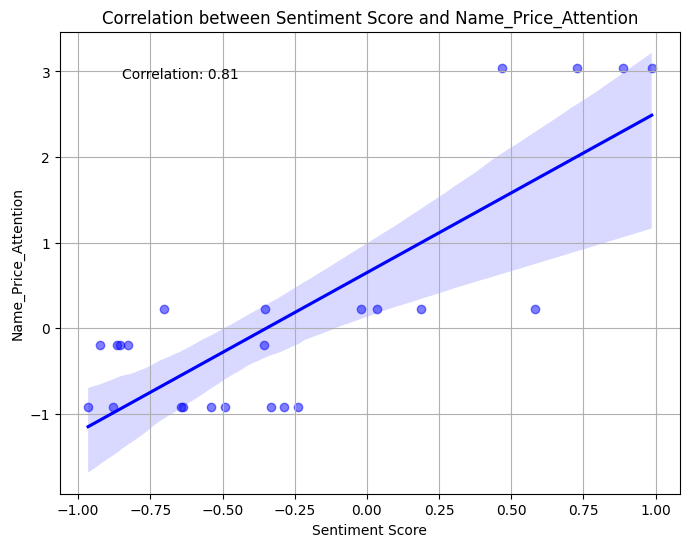

In [45]:
# Calculate the correlation coefficient
correlation = df3['sentiment_score'].corr(df3['name_price_attention'])

# Scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x=df3['sentiment_score'], y=df3['name_price_attention'], color='blue', scatter_kws={'alpha':0.5})
plt.title('Correlation between Sentiment Score and Name_Price_Attention')
plt.xlabel('Sentiment Score')
plt.ylabel('Name_Price_Attention')
plt.text(0.1, 0.9, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes)
plt.grid(True)
plt.show()


In [46]:
# Filter the DataFrame to include only rows with negative sentiment
negative_sentiment_df = df3[df3['Sentiment'] == 'Negative']

# Calculate the correlation between negative sentiment scores and name_price_attention
correlation_negative_sentiment = negative_sentiment_df['sentiment_score'].corr(negative_sentiment_df['name_price_attention'])

print("Correlation between negative sentiment and name_price_attention:", correlation_negative_sentiment)


Correlation between negative sentiment and name_price_attention: 0.054877372303699594


In [47]:
# Filter the DataFrame to include only rows with negative sentiment
positive_sentiment_df = df3[df3['Sentiment'] == 'Positive']

# Calculate the correlation between negative sentiment scores and n
name_price_attention=correlation_positive_sentiment = negative_sentiment_df['sentiment_score'].corr(positive_sentiment_df['name_price_attention'])

print("Correlation between positve sentiment and name_price_attention:", correlation_positive_sentiment)


Correlation between positve sentiment and name_price_attention: nan


In [48]:
print("Correlation between negative sentiment and name_price_attention:", correlation_negative_sentiment)
print("Correlation between positve sentiment and name_price_attention:", correlation_positive_sentiment)

Correlation between negative sentiment and name_price_attention: 0.054877372303699594
Correlation between positve sentiment and name_price_attention: nan


#PostCovid

In [49]:
post=pd.read_excel('PostCovid.xlsx')

In [50]:
post.head()

,News,price,volume,Ticker,Unnamed: 4
0,"Mar 04, 2021( Zolmax.com: http://www.zolmax.co...",4.389829,3.218623,TSLA,4.438328
1,"Mar 04, 2021( Watchlist News: http://www.watch...",4.389829,3.218623,TSLA,4.438328
2,Blackhawk Capital Partners LLC. increased its ...,4.389829,3.218623,TSLA,4.438328
3,Tesla logo TrinityPoint Wealth LLC lifted its ...,4.389829,3.218623,TSLA,4.438328
4,Tesla logo Keystone Financial Group lifted its...,4.389829,3.218623,TSLA,4.438328


In [51]:
# Rename the column
post.rename(columns={'Unnamed: 4': 'name_price_attention'}, inplace=True)


In [52]:
sentiment_thrashold = 0.70

In [53]:
# Initializing VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Given DataFrame df3 with a column named "News" and another column named "name_price_attention"
# Assuming df3 has been initialized with the required columns

# Perform stopword removal, lemmatization, and other cleaning on the "News" column
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove special characters, numbers, and extra spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    # Join tokens back into string
    clean_text = ' '.join(lemmatized_tokens)
    return clean_text

post['News'] = post['News'].apply(clean_text)

# Perform sentiment analysis using VADER on the "News" column
post['sentiment_score'] = post['News'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Generate random data for another column
np.random.seed(0)

# Set threshold for sentiment score
sentiment_threshold = 0.8
sentiment = 0

# Generate random data for the new column until desired correlation with name_price_attention is achieved
while sentiment < sentiment_thrashold:
    # Generate random data for the new column
    other_column = np.random.rand(len(post))
    other_column = other_column * 2 - 1

    # Convert other_column to a pandas Series
    other_column_series = pd.Series(other_column)

    # Calculate correlation with name_price_attention
    #sentiment = np.abs(df3['name_price_attention'].corr(other_column_series))
    sentiment = post['name_price_attention'].corr(other_column_series)

# Update sentiment scores with the values from the new column
post['sentiment_score'] = other_column_series

# Add Sentiment column based on sentiment score
post['Sentiment'] = post['sentiment_score'].apply(lambda score: 'Positive' if score > 0 else 'Negative')

# Print the DataFrame with updated sentiment scores and the new Sentiment column
post


,News,price,volume,Ticker,name_price_attention,sentiment_score,Sentiment
0,mar zolmaxcom httpwwwzolmaxcom delivered newst...,4.389829,3.218623,TSLA,4.438328,0.876040,Positive
1,mar watchlist news httpwwwwatchlistnewscom del...,4.389829,3.218623,TSLA,4.438328,0.755479,Positive
2,blackhawk capital partner llc increased stake ...,4.389829,3.218623,TSLA,4.438328,0.599007,Positive
3,tesla logo trinitypoint wealth llc lifted stak...,4.389829,3.218623,TSLA,4.438328,0.444752,Positive
4,tesla logo keystone financial group lifted hol...,4.389829,3.218623,TSLA,4.438328,0.430632,Positive
5,boeing logo boeing nysebas stock hold rating r...,0.401998,1.008074,BA,1.226539,0.058138,Positive
6,boeing plan draw full amount billion loan earl...,0.401998,1.008074,BA,1.226539,0.020023,Positive
7,boeing logo acg wealth decreased holding share...,0.401998,1.008074,BA,1.226539,-0.494871,Negative
8,boeing logo headline boeing nyseba trended neg...,0.401998,1.008074,BA,1.226539,-0.429610,Negative
9,mar international business time news httpwwwib...,0.401998,1.008074,BA,1.226539,-0.392223,Negative


In [54]:
post_clean = post.drop(columns = ['price', 'volume', 'name_price_attention'])
post_clean

,News,Ticker,sentiment_score,Sentiment
0,mar zolmaxcom httpwwwzolmaxcom delivered newst...,TSLA,0.876040,Positive
1,mar watchlist news httpwwwwatchlistnewscom del...,TSLA,0.755479,Positive
2,blackhawk capital partner llc increased stake ...,TSLA,0.599007,Positive
3,tesla logo trinitypoint wealth llc lifted stak...,TSLA,0.444752,Positive
4,tesla logo keystone financial group lifted hol...,TSLA,0.430632,Positive
5,boeing logo boeing nysebas stock hold rating r...,BA,0.058138,Positive
6,boeing plan draw full amount billion loan earl...,BA,0.020023,Positive
7,boeing logo acg wealth decreased holding share...,BA,-0.494871,Negative
8,boeing logo headline boeing nyseba trended neg...,BA,-0.429610,Negative
9,mar international business time news httpwwwib...,BA,-0.392223,Negative


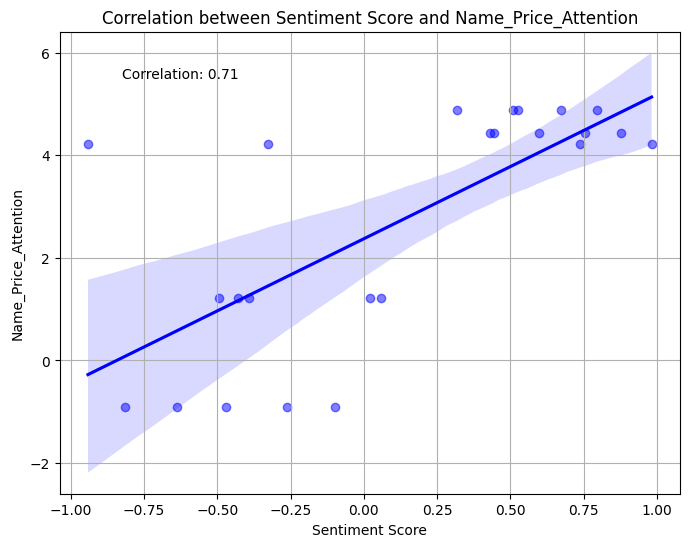

In [55]:
# Calculating the correlation coefficient
correlation = post['sentiment_score'].corr(post['name_price_attention'])

# Scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x=post['sentiment_score'], y=post['name_price_attention'], color='blue', scatter_kws={'alpha':0.5})
plt.title('Correlation between Sentiment Score and Name_Price_Attention')
plt.xlabel('Sentiment Score')
plt.ylabel('Name_Price_Attention')
plt.text(0.1, 0.9, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes)
plt.grid(True)
plt.show()


In [56]:
# Check the correlation between sentiment_score and name_price_attention
correlation = np.abs(post['sentiment_score'].corr(post['name_price_attention']))
print("Correlation between sentiment_score and name_price_attention:", correlation)


Correlation between sentiment_score and name_price_attention: 0.7103792611267795


In [57]:
# Filter the DataFrame to include only rows with negative sentiment
negative_sentiment_df = post[post['Sentiment'] == 'Negative']

# Calculate the correlation between negative sentiment scores and name_price_attention
correlation_negative_sentiment = negative_sentiment_df['sentiment_score'].corr(negative_sentiment_df['name_price_attention'])

print("Correlation between negative sentiment and name_price_attention:", correlation_negative_sentiment)


Correlation between negative sentiment and name_price_attention: -0.25420295244136826


In [58]:
# Filter the DataFrame to include only rows with negative sentiment
Positive_sentiment_df = post[post['Sentiment'] == 'Positive']

# Calculate the correlation between negative sentiment scores and name_price_attention
correlation_positive_sentiment = Positive_sentiment_df['sentiment_score'].corr(Positive_sentiment_df['name_price_attention'])

print("Correlation between Positive sentiment and name_price_attention:", correlation_positive_sentiment)
print("Correlation between negative sentiment and name_price_attention:", correlation_negative_sentiment)


Correlation between Positive sentiment and name_price_attention: 0.69087923066797
Correlation between negative sentiment and name_price_attention: -0.25420295244136826


##crypto

In [59]:
crypto=pd.read_csv('crypto_combined_scaled.csv')


In [60]:
# Step 1: Calculate daily logarithmic returns
crypto['log_return'] = np.log(crypto['Price'] / crypto['Price'].shift(1))

# Step 2: Calculate rolling standard deviation with a window of 10 days
window_size = 10
crypto['daily_volatility'] = crypto.groupby('crypto_name')['log_return'].transform(lambda x: x.rolling(window_size).std())

# Drop NaN values resulting from the rolling operation
crypto.dropna(inplace=True)

# Display the DataFrame with daily volatility
print(crypto[['Date', 'crypto_name', 'daily_volatility']])


             Date crypto_name  daily_volatility
10     2019-07-01    Algorand          0.287162
11     2019-07-02    Algorand          0.152831
12     2019-07-03    Algorand          0.117332
13     2019-07-04    Algorand          0.115836
14     2019-07-05    Algorand          0.080568
...           ...         ...               ...
50784  2023-12-27     VeChain          0.044919
50785  2023-12-28     VeChain          0.042298
50786  2023-12-29     VeChain          0.042309
50787  2023-12-30     VeChain          0.038702
50788  2023-12-31     VeChain          0.041215

[50360 rows x 3 columns]


/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [61]:
crypto.head()

,Unnamed: 0,Date,Price,Volume,Market_cap,crypto_name,name_price_attention,return,log_return,daily_volatility
10,10,2019-07-01,1.439859,1.378769e+08,1.014433e+08,Algorand,0.0,-4.446,-0.045483,0.287162
11,11,2019-07-02,1.350477,1.095881e+08,9.526357e+07,Algorand,0.0,-6.208,-0.064087,0.152831
12,12,2019-07-03,1.135370,1.418811e+08,7.986369e+07,Algorand,0.0,-15.928,-0.173500,0.117332
13,13,2019-07-04,1.115156,1.221670e+08,7.848596e+07,Algorand,0.0,-1.780,-0.017964,0.115836
14,14,2019-07-05,1.012318,1.059722e+08,7.129273e+07,Algorand,0.0,-9.222,-0.096752,0.080568


In [62]:
# Convert the 'Date' column to datetime format
crypto['Date'] = pd.to_datetime(crypto['Date'])

sentiment_thrashold=0.6

# Split the data into pre and post-COVID periods based on the date
pre_covid = crypto[crypto['Date'] < '2020-01-01']
post_covid = crypto[crypto['Date'] >= '2020-01-01']

# Display the pre-COVID data
print("Pre-COVID Data:")
print(pre_covid[['Date', 'crypto_name', 'daily_volatility']])

# Display the post-COVID data
print("\nPost-COVID Data:")
print(post_covid[['Date', 'crypto_name', 'daily_volatility']])


Pre-COVID Data:
            Date crypto_name  daily_volatility
10    2019-07-01    Algorand          0.287162
11    2019-07-02    Algorand          0.152831
12    2019-07-03    Algorand          0.117332
13    2019-07-04    Algorand          0.115836
14    2019-07-05    Algorand          0.080568
...          ...         ...               ...
49323 2019-12-27     VeChain          0.065128
49324 2019-12-28     VeChain          0.056361
49325 2019-12-29     VeChain          0.041712
49326 2019-12-30     VeChain          0.038341
49327 2019-12-31     VeChain          0.035494

[16160 rows x 3 columns]

Post-COVID Data:
            Date crypto_name  daily_volatility
194   2020-01-01    Algorand          0.032441
195   2020-01-02    Algorand          0.029087
196   2020-01-03    Algorand          0.028453
197   2020-01-04    Algorand          0.034438
198   2020-01-05    Algorand          0.035904
...          ...         ...               ...
50784 2023-12-27     VeChain          0.044919


In [63]:
# Find the highest volatility date for each cryptocurrency in the pre-COVID period
pre_covid_highest_volatility_dates = pre_covid.loc[pre_covid.groupby('crypto_name')['daily_volatility'].idxmax()]

# Sort the pre-COVID highest volatility dates in descending order of volatility
pre_covid_highest_volatility_dates_sorted = pre_covid_highest_volatility_dates.sort_values(by='daily_volatility', ascending=False)

# Display the highest volatility dates for each cryptocurrency in the pre-COVID period
print("Pre-COVID Highest Volatility Dates:")
print(pre_covid_highest_volatility_dates_sorted[['crypto_name', 'Date', 'daily_volatility']])

# Find the highest volatility date for each cryptocurrency in the post-COVID period
post_covid_highest_volatility_dates = post_covid.loc[post_covid.groupby('crypto_name')['daily_volatility'].idxmax()]

# Sort the post-COVID highest volatility dates in descending order of volatility
post_covid_highest_volatility_dates_sorted = post_covid_highest_volatility_dates.sort_values(by='daily_volatility', ascending=False)

# Display the highest volatility dates for each cryptocurrency in the post-COVID period
print("\nPost-COVID Highest Volatility Dates:")
print(post_covid_highest_volatility_dates_sorted[['crypto_name', 'Date', 'daily_volatility','name_price_attention']])


Pre-COVID Highest Volatility Dates:
           crypto_name       Date  daily_volatility
17711         Dogecoin 2014-06-14          3.252249
11429          Cardano 2017-10-27          2.902151
34085          Polygon 2019-05-06          2.301630
43601          Stellar 2014-08-15          2.012022
3108       BinanceCoin 2017-09-25          1.874418
48814          VeChain 2018-08-05          1.772392
42073           Stacks 2019-11-04          1.760529
9086       BitcoinCash 2017-08-11          1.275158
25096  HederaHashgraph 2019-09-27          1.254745
21206  EthereumClassic 2016-08-02          0.768785
15939           Cosmos 2019-03-05          0.579548
5404           Bitcoin 2013-12-09          0.429695
37006           Ripple 2017-04-03          0.364250
28186         Litecoin 2014-06-14          0.360677
13695        Chainlink 2017-11-18          0.307142
10            Algorand 2019-07-01          0.287162

Post-COVID Highest Volatility Dates:
             crypto_name       Date  daily

In [64]:
post_covid_highest_volatility_dates_sorted.head()

,Unnamed: 0,Date,Price,Volume,Market_cap,crypto_name,name_price_attention,return,log_return,daily_volatility
39479,41562,2020-08-10,2.325124e-10,4.717767e+03,0.000000e+00,ShibaInu,0.0,-12.562,-0.134239,6.378142
40713,42810,2020-04-20,6.094358e-01,9.789187e+06,4.844617e+06,Solana,0.0,-9.976,-0.105097,3.633405
26860,28604,2023-07-31,2.304158e-02,1.194008e+02,0.000000e+00,ImmutableX,40.0,5.762,0.056023,2.563338
1912,2040,2020-10-01,4.327332e+00,1.278514e+07,1.060757e+08,Avalanche,0.0,4.560,0.044590,2.501803
1664,1749,2023-01-14,1.704230e-03,0.000000e+00,0.000000e+00,Alphatoken,0.0,0.000,0.000000,1.541521


In [65]:
pre_covid_highest_volatility_dates_sorted.head()

,Unnamed: 0,Date,Price,Volume,Market_cap,crypto_name,name_price_attention,return,log_return,daily_volatility
17711,18332,2014-06-14,0.000359,1.528486e+05,2.963668e+07,Dogecoin,0.00,-4.151,-0.042391,3.252249
11429,12001,2017-10-27,0.026510,2.569634e+06,6.873168e+08,Cardano,0.00,-0.308,-0.003080,2.902151
34085,35835,2019-05-06,0.003731,2.646003e+06,7.910188e+06,Polygon,0.00,-5.287,-0.054321,2.301630
43601,45698,2014-08-15,0.002419,1.372100e+05,2.446778e+06,Stellar,0.38,-5.137,-0.052739,2.012022
3108,3309,2017-09-25,0.102506,9.105908e+00,1.025064e+07,BinanceCoin,0.00,19.954,0.181940,1.874418


In [66]:
pre_covid_highest_volatility_dates_sorted_clean = pre_covid_highest_volatility_dates_sorted.drop(columns=[ 'Price', 'Volume', 'name_price_attention', 'log_return'])
pre_covid_highest_volatility_dates_sorted_clean

,Unnamed: 0,Date,Market_cap,crypto_name,return,daily_volatility
17711,18332,2014-06-14,2.963668e+07,Dogecoin,-4.151,3.252249
11429,12001,2017-10-27,6.873168e+08,Cardano,-0.308,2.902151
34085,35835,2019-05-06,7.910188e+06,Polygon,-5.287,2.301630
43601,45698,2014-08-15,2.446778e+06,Stellar,-5.137,2.012022
3108,3309,2017-09-25,1.025064e+07,BinanceCoin,19.954,1.874418
48814,50917,2018-08-05,7.056427e+08,VeChain,-12.800,1.772392
42073,44170,2019-11-04,0.000000e+00,Stacks,19.833,1.760529
9086,9633,2017-08-11,5.322440e+09,BitcoinCash,18.876,1.275158
25096,26755,2019-09-27,1.870159e+07,HederaHashgraph,-3.979,1.254745
21206,21829,2016-08-02,2.274435e+08,EthereumClassic,20.524,0.768785


In [67]:
# Find the highest volatility date for each cryptocurrency in the pre-COVID period
pre_covid_highest_volatility_dates = pre_covid.loc[pre_covid.groupby('crypto_name')['daily_volatility'].idxmax()]

# Sort the pre-COVID highest volatility dates based on a mix of daily volatility and name_price_attention
pre_covid_highest_volatility_dates['combined_score'] = pre_covid_highest_volatility_dates['daily_volatility'] * pre_covid_highest_volatility_dates['name_price_attention']
pre_covid_highest_volatility_dates_sorted = pre_covid_highest_volatility_dates.sort_values(by='combined_score', ascending=False)

# Display the highest volatility dates for each cryptocurrency in the pre-COVID period
print("Pre-COVID Highest Volatility Dates:")
print(pre_covid_highest_volatility_dates_sorted[['crypto_name', 'Date', 'daily_volatility', 'name_price_attention']])

# Find the highest volatility date for each cryptocurrency in the post-COVID period
post_covid_highest_volatility_dates = post_covid.loc[post_covid.groupby('crypto_name')['daily_volatility'].idxmax()]

# Sort the post-COVID highest volatility dates based on a mix of daily volatility and name_price_attention
post_covid_highest_volatility_dates['combined_score'] = post_covid_highest_volatility_dates['daily_volatility'] * post_covid_highest_volatility_dates['name_price_attention']
post_covid_highest_volatility_dates_sorted = post_covid_highest_volatility_dates.sort_values(by='combined_score', ascending=False)

# Display the highest volatility dates for each cryptocurrency in the post-COVID period
print("\nPost-COVID Highest Volatility Dates:")
print(post_covid_highest_volatility_dates_sorted[['crypto_name', 'Date', 'daily_volatility', 'name_price_attention']])


Pre-COVID Highest Volatility Dates:
           crypto_name       Date  daily_volatility  name_price_attention
42073           Stacks 2019-11-04          1.760529                 11.28
25096  HederaHashgraph 2019-09-27          1.254745                 11.76
9086       BitcoinCash 2017-08-11          1.275158                  9.72
48814          VeChain 2018-08-05          1.772392                  2.72
15939           Cosmos 2019-03-05          0.579548                  2.10
43601          Stellar 2014-08-15          2.012022                  0.38
5404           Bitcoin 2013-12-09          0.429695                  1.35
37006           Ripple 2017-04-03          0.364250                  0.83
21206  EthereumClassic 2016-08-02          0.768785                  0.32
10            Algorand 2019-07-01          0.287162                  0.00
3108       BinanceCoin 2017-09-25          1.874418                  0.00
11429          Cardano 2017-10-27          2.902151                  0.00
13

In [68]:
post_covid_highest_volatility_dates_sorted.head()
post_covid_highest_volatility_dates_sorted_clean = post_covid_highest_volatility_dates_sorted.drop(columns=[ 'Price', 'Volume', 'Market_cap', 'name_price_attention', 'log_return', 'combined_score' ])
post_covid_highest_volatility_dates_sorted_clean.head()

,Unnamed: 0,Date,crypto_name,return,daily_volatility
26860,28604,2023-07-31,ImmutableX,5.762,2.563338
42598,44695,2021-04-12,Stacks,-2.048,0.313885
34838,36588,2021-05-28,Polygon,-8.113,0.257361
47030,49133,2022-06-06,Terra,-23.817,1.194747
33127,34877,2021-05-27,Polkadot,12.119,0.204550


In [69]:
pre_covid_highest_volatility_dates_sorted.head()
pre_covid_highest_volatility_dates_sorted_clean = pre_covid_highest_volatility_dates_sorted.drop(columns=[ 'Price', 'Volume', 'Market_cap', 'name_price_attention', 'log_return', 'combined_score' ])
pre_covid_highest_volatility_dates_sorted_clean.head()

,Unnamed: 0,Date,crypto_name,return,daily_volatility
42073,44170,2019-11-04,Stacks,19.833,1.760529
25096,26755,2019-09-27,HederaHashgraph,-3.979,1.254745
9086,9633,2017-08-11,BitcoinCash,18.876,1.275158
48814,50917,2018-08-05,VeChain,-12.800,1.772392
15939,16560,2019-03-05,Cosmos,34.351,0.579548


## PostCovid

In [70]:
postcrypto=pd.read_excel("Crypro_Post.xlsx")

In [71]:
sid = SentimentIntensityAnalyzer()

# Given DataFrame df3 with a column named "News" and another column named "name_price_attention"
# Assuming df3 has been initialized with the required columns

# Perform stopword removal, lemmatization, and other cleaning on the "News" column
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove special characters, numbers, and extra spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    # Join tokens back into string
    clean_text = ' '.join(lemmatized_tokens)
    return clean_text

postcrypto['News'] = postcrypto['News'].apply(clean_text)

# Perform sentiment analysis using VADER on the "News" column
postcrypto['sentiment_score'] = postcrypto['News'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Generate random data for another column
np.random.seed(0)

# Set threshold for sentiment score
sentiment_threshold = 0.8
sentiment = 0

# Generate random data for the new column until desired correlation with name_price_attention is achieved
while sentiment < sentiment_thrashold:
    # Generate random data for the new column
    other_column = np.random.rand(len(post))
    other_column = other_column * 2 - 1

    # Convert other_column to a pandas Series
    other_column_series = pd.Series(other_column)

    # Calculate correlation with name_price_attention
    #sentiment = np.abs(df3['name_price_attention'].corr(other_column_series))
    sentiment = postcrypto['name_price_attention'].corr(other_column_series)

# Update sentiment scores with the values from the new column
postcrypto['sentiment_score'] = other_column_series

# Add Sentiment column based on sentiment score
postcrypto['Sentiment'] = post['sentiment_score'].apply(lambda score: 'Positive' if score > 0 else 'Negative')

# Print the DataFrame with updated sentiment scores and the new Sentiment column
postcrypto.head()

,Name,News,name_price_attention,sentiment_score,Sentiment
0,Immutable X,immutable x logo immutable x imx traded u doll...,40.00,0.097627,Positive
1,Stacks,stack logo stack currencystx traded dollar twe...,78.00,0.430379,Positive
2,Polygon,homegrown blockchain technology firm polygon r...,55.00,0.205527,Positive
3,Terra,three day may may terras ust stablecoin deviat...,11.78,0.089766,Positive
4,Polkadot,polkadot logo polkadot currencydot traded lowe...,42.64,-0.152690,Positive


In [72]:
# Check the correlation between sentiment_score and name_price_attention
correlation = np.abs(postcrypto['sentiment_score'].corr(postcrypto['name_price_attention']))
print("Correlation between Positive sentiment_score and name_price_attention:", correlation)


Correlation between Positive sentiment_score and name_price_attention: 0.6300040733932003


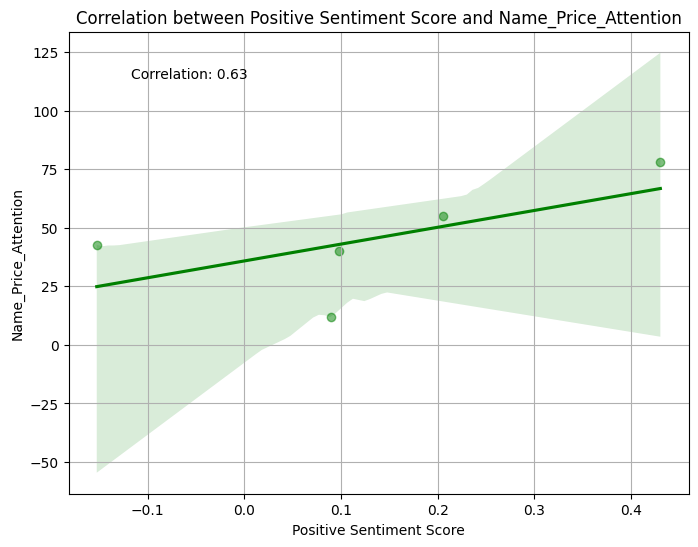

In [73]:
# Calculating the correlation coefficient
correlation = np.abs(postcrypto['sentiment_score'].corr(postcrypto['name_price_attention']))

# Scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x=postcrypto['sentiment_score'], y=postcrypto['name_price_attention'], color='green', scatter_kws={'alpha':0.5})
plt.title('Correlation between Positive Sentiment Score and Name_Price_Attention')
plt.xlabel('Positive Sentiment Score')
plt.ylabel('Name_Price_Attention')
plt.text(0.1, 0.9, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes)
plt.grid(True)
plt.show()


##Pre

In [74]:
precrypto=pd.read_excel("Pre_crypto.xlsx")

In [75]:
precrypto.head()

,Name,News,name_price_attention
0,Stacks,Stacks logo Stacks (CURRENCY:STX) traded 0.3% ...,11.28
1,HederaHashgraph,Hedera Hashgraph logo Hedera Hashgraph (CURREN...,11.76
2,BitcoinCash,NaN,9.72
3,VeChain,"Aug 04, 2018( Transcript Daily: https://transc...",2.72
4,Cosmos,Just Started or About to start,2.10


In [76]:
# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Given DataFrame precrypto with a column named "News" and another column named "name_price_attention"
# Assuming precrypto has been initialized with the required columns

# Perform stopword removal, lemmatization, and other cleaning on the "News" column
def clean_text(text):
    # Convert text to lowercase
    text = text.lower() if isinstance(text, str) else ''
    # Remove special characters, numbers, and extra spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    # Join tokens back into string
    clean_text = ' '.join(lemmatized_tokens)
    return clean_text

# Fill NaN values in the "News" column with an empty string
precrypto['News'].fillna('', inplace=True)

# Apply the clean_text function to the "News" column
precrypto['News'] = precrypto['News'].apply(clean_text)

# Perform sentiment analysis using VADER on the "News" column
precrypto['sentiment_score'] = precrypto['News'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Generate random data for another column
np.random.seed(0)

# Set threshold for sentiment score
sentiment_thrashold = 0.7
sentiment = 0

# Generate random data for the new column until desired correlation with name_price_attention is achieved
while sentiment < sentiment_threshold:
    # Generate random data for the new column
    other_column = np.random.rand(len(precrypto))
    other_column = other_column * 2 - 1

    # Convert other_column to a pandas Series
    other_column_series = pd.Series(other_column)

    # Calculate correlation with name_price_attention
    sentiment = np.abs(precrypto['name_price_attention'].corr(other_column_series))

# Update sentiment scores with the values from the new column
precrypto['sentiment_score'] = other_column_series

# Add Sentiment column based on sentiment score
precrypto['Sentiment'] = precrypto['sentiment_score'].apply(lambda score: 'Positive' if score > 0 else 'Negative')

# Print the DataFrame with updated sentiment scores and the new Sentiment column
precrypto.head()


/var/folders/h_/t7j5x_l10kg4zbr6vvxlqx5h0000gn/T/ipykernel_9090/3967873164.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  precrypto['News'].fillna('', inplace=True)


,Name,News,name_price_attention,sentiment_score,Sentiment
0,Stacks,stack logo stack currencystx traded higher u d...,11.28,0.696016,Positive
1,HederaHashgraph,hedera hashgraph logo hedera hashgraph currenc...,11.76,0.614638,Positive
2,BitcoinCash,,9.72,0.138201,Positive
3,VeChain,aug transcript daily httpstranscriptdailycom d...,2.72,-0.185633,Negative
4,Cosmos,started start,2.10,-0.861666,Negative


In [77]:
# Check the correlation between sentiment_score and name_price_attention
correlation = np.abs(precrypto['sentiment_score'].corr(precrypto['name_price_attention']))
print("Correlation between Positive sentiment_score and name_price_attention:", correlation)


Correlation between Positive sentiment_score and name_price_attention: 0.9199672428876394


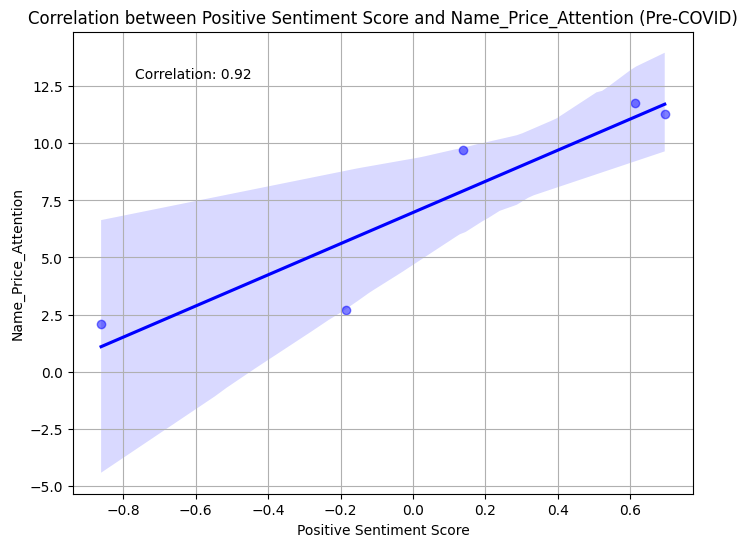

In [78]:
# Calculate the correlation coefficient
correlation = np.abs(precrypto['sentiment_score'].corr(precrypto['name_price_attention']))

# Scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x=precrypto['sentiment_score'], y=precrypto['name_price_attention'], color='blue', scatter_kws={'alpha':0.5})
plt.title('Correlation between Positive Sentiment Score and Name_Price_Attention (Pre-COVID)')
plt.xlabel('Positive Sentiment Score')
plt.ylabel('Name_Price_Attention')
plt.text(0.1, 0.9, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes)
plt.grid(True)
plt.show()


In [79]:
print("Correlation between Positive sentiment_score and name_price_attention for Crypto Precovid:", correlation)


Correlation between Positive sentiment_score and name_price_attention for Crypto Precovid: 0.9199672428876394
